In [1]:
from env_predicter import *

In [2]:
args = NewArgs(run_name="test")

agent_args = BasicArgs(
    seed=0,
    n_envs=8,
    manhatten_fac=0,
    batch_size=32,
    min_eps=0.05,
    n_epoch_refil=1,
    n_obs_reward=args.n_steps_fut + 1,
    device = args.device
)

random.seed(agent_args.seed)
np.random.seed(agent_args.seed)
torch.manual_seed(agent_args.seed)

agent = DoubleQNET(agent_args)
agent.load_state_dict(torch.load("../best.ckpt", map_location=agent_args.device))

envs = gym.vector.AsyncVectorEnv(
[
    make_env(
        width=agent_args.width_and_height,
        height=agent_args.width_and_height,
        border=agent_args.border,
        food_amount=agent_args.food_amount,
        render_mode="rgb_array",
        manhatten_fac=agent_args.manhatten_fac,
        mode="train",
        seed=i + agent_args.seed,
    )
    for i in range(agent_args.n_envs)
]
)

linear eps anneal


In [3]:
data = gen_data(1000, 0.2, agent=agent, agent_args=agent_args,envs=envs, args=args)


sample for eps 0.2: 100%|██████████| 128/128 [00:02<00:00, 63.29it/s]


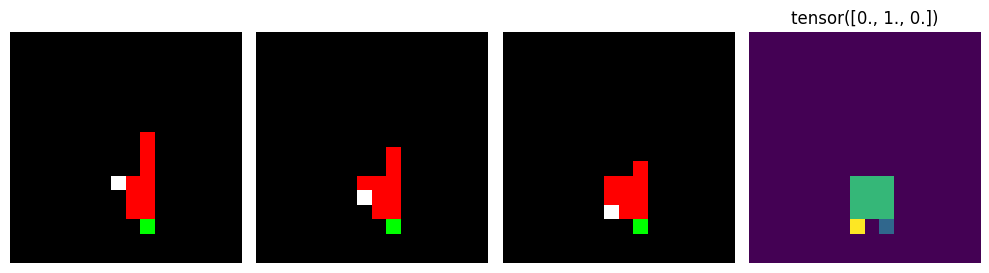

In [26]:
import random

dataset = EnvDataset(data)
x,y = random.choice(dataset)
imgs,label = x.numpy(),y.numpy()

imgs = np.transpose(x, (2,1,0))

plt.figure(figsize=(10,4))
for i in range(args.n_steps_fut):
    plt.subplot(1, args.n_steps_fut + 1, i +1)
    plt.imshow(imgs[:,:,i*3:(i+1)*3])
    plt.axis("off")
    
plt.subplot(1, args.n_steps_fut + 1, 4)
plt.axis("off")
plt.imshow(label.T)
plt.title(str(imgs[0,0,9:]))
plt.tight_layout()
plt.show()
